In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,31-01-2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,02-02-2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,20-08-2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,26-08-2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,22-09-2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,07-10-2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,18-11-2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,18-12-2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,19-09-2022,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,09-10-2022,Penicillin,Abnormal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224655,202.000000
50%,52.000000,25538.069380,302.000000
75%,68.000000,37820.508432,401.000000
max,89.000000,52764.276740,500.000000


In [ ]:
df.dropna()
df.drop_duplicates(inplace=True)

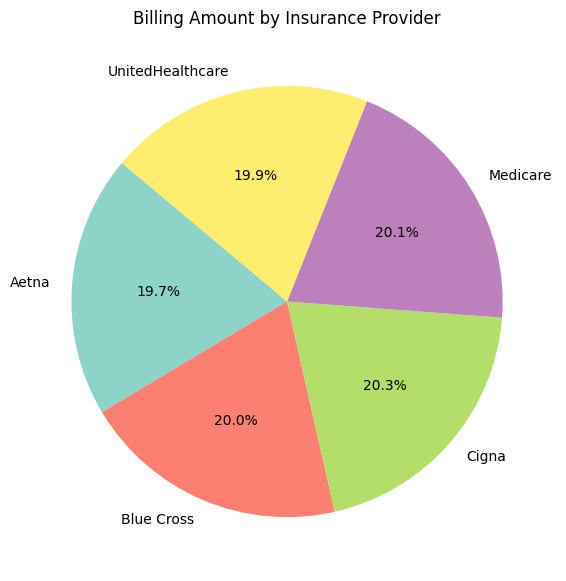

In [ ]:
billing_by_insurance = df.groupby('Insurance Provider')['Billing Amount'].sum()

plt.figure(figsize=(10, 7))
billing_by_insurance.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Billing Amount by Insurance Provider')
plt.ylabel('')
plt.show()

The Pie chart concludes that there is no dominant Insurance Provider which spend a large amount of money compared to others. the top 3 are Cigna , Medicare and Blue Cross

<ipython-input-7-97d1c50a7b1b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medical Condition', y='Age', data=avg_age_by_condition, palette='viridis')


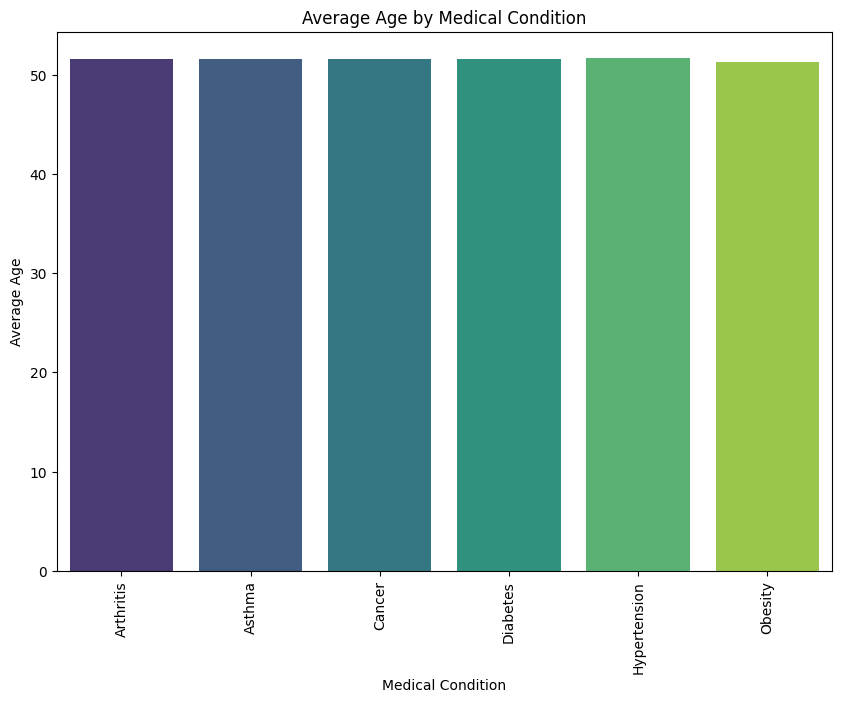

In [ ]:
avg_age_by_condition = df.groupby('Medical Condition')['Age'].mean().reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(x='Medical Condition', y='Age', data=avg_age_by_condition, palette='viridis')
plt.xlabel('Medical Condition')
plt.ylabel('Average Age')
plt.title('Average Age by Medical Condition')
plt.xticks(rotation=90)
plt.show()

The bar Chart concludes that the people in their or after their 50s are most prone to medical condition of cancer, diabetes,arthritis, asthama, hypertension and obesity


<Figure size 1400x800 with 0 Axes>

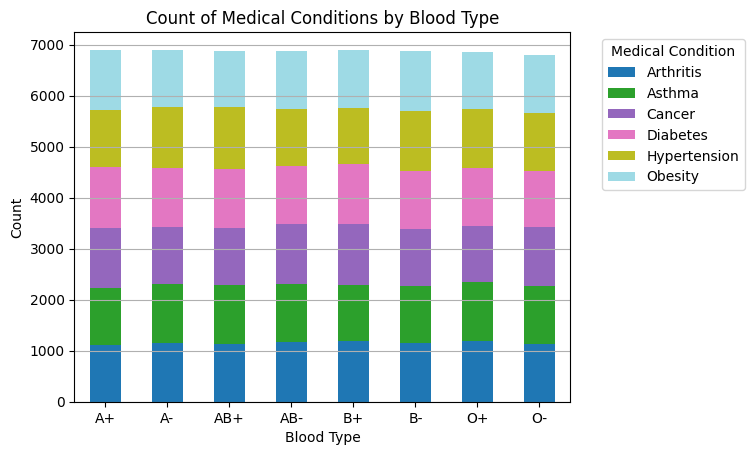

In [ ]:
count_by_blood_type = df.groupby(['Blood Type', 'Medical Condition']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
count_by_blood_type.plot(kind='bar', stacked=True, cmap='tab20')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.title('Count of Medical Conditions by Blood Type')
plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

This chart concludes that there is no big relation between blood groups and these medical conditions as the count of patients for all of them are similar to each other


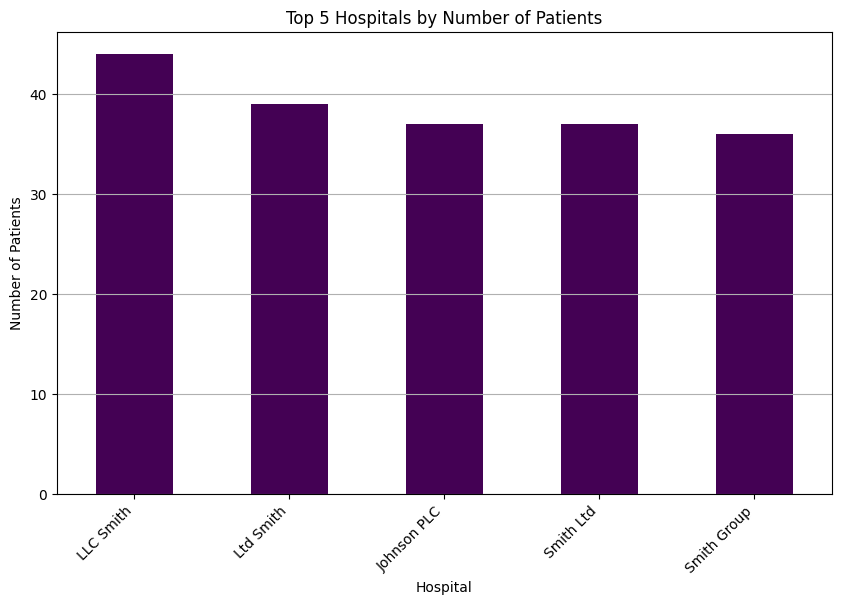

In [ ]:
hospital_patient_counts = df['Hospital'].value_counts()

top_5_hospitals = hospital_patient_counts.head(5)

plt.figure(figsize=(10, 6))
top_5_hospitals.plot(kind='bar', cmap='viridis')
plt.xlabel('Hospital')
plt.ylabel('Number of Patients')
plt.title('Top 5 Hospitals by Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

This Chart concludes that LLC Smith has the highest number of patients admitted followed by Ltd Smith, Johnson PLC, Smith Ltd and Smith Group. These hospitals should ensure that they provide good facilities and have a high number of beds in case of emergency

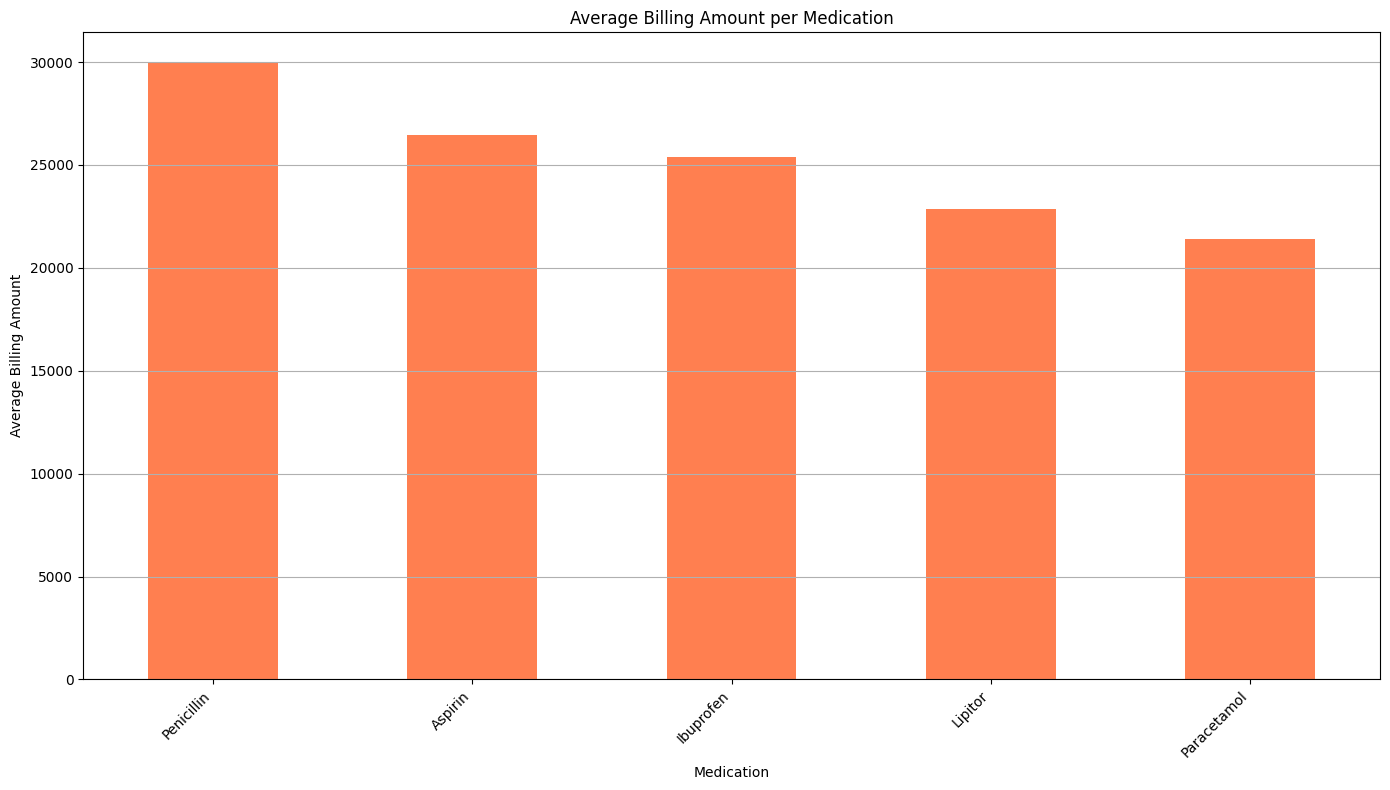

In [ ]:
avg_billing_per_medication = df.groupby('Medication')['Billing Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
avg_billing_per_medication.plot(kind='bar', color='coral')
plt.xlabel('Medication')
plt.ylabel('Average Billing Amount')
plt.title('Average Billing Amount per Medication')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()




This Chart concludes that the average billing amount of Penicillin is the highest followed by aspirin and ibuprofen

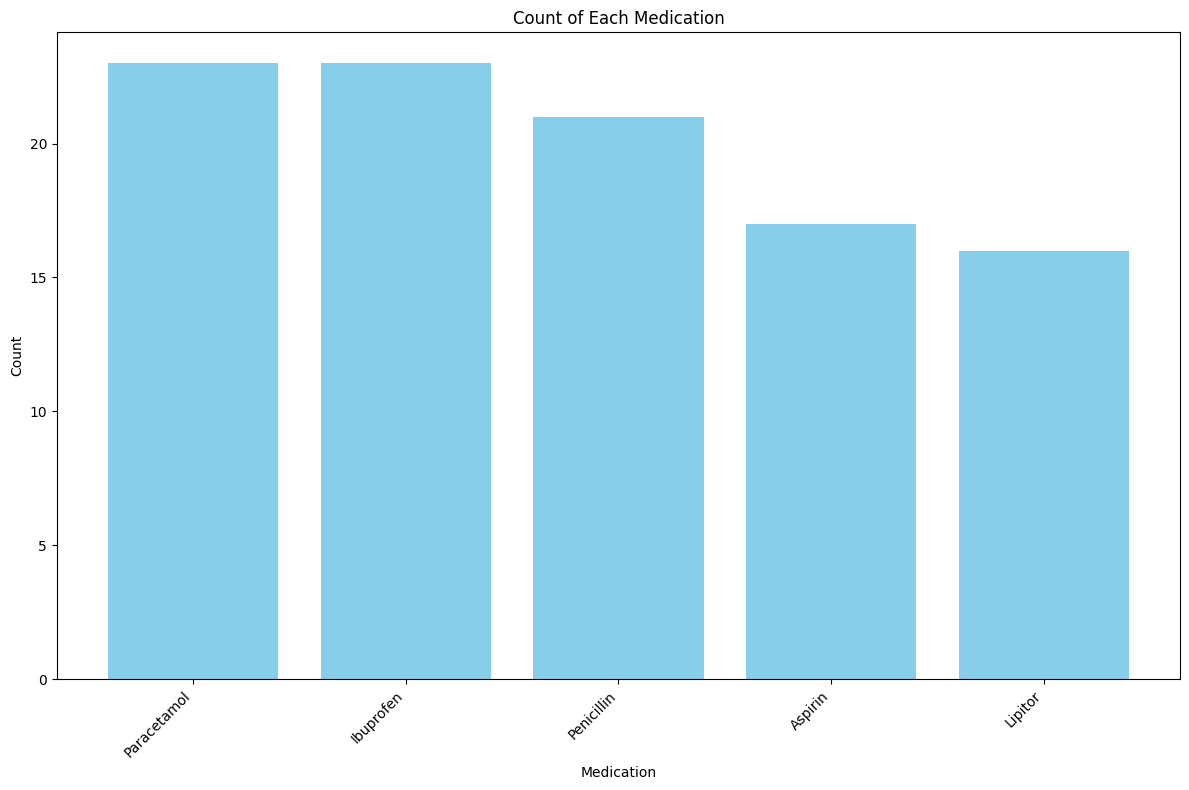

In [ ]:
medication_counts = df['Medication'].value_counts().reset_index()
medication_counts.columns = ['Medication', 'Count']

plt.figure(figsize=(12, 8))
plt.bar(medication_counts['Medication'], medication_counts['Count'], color='skyblue')
plt.xlabel('Medication')
plt.ylabel('Count')
plt.title('Count of Each Medication')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# New section

This Chart concludes that paracetamol was the most prescribed medication to all the patients followed by ibuprofen and penicillin
